In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
sns.set_palette('tab20c')
import squarify

import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data = pd.read_json("C:/Users/navee/OneDrive/Desktop/Casestudy/classification_loan_dataset/loan_data.json")

loan_data.head()

Application_ID Gender Married Dependents     Education Self_Employed  \
0       LP001002   Male      No          0      Graduate            No   
1       LP001003   Male     Yes          1      Graduate            No   
2       LP001005   Male     Yes          0      Graduate           Yes   
3       LP001006   Male     Yes          0  Not Graduate            No   
4       LP001008   Male      No          0      Graduate            No   

   Credit_History Property_Area  Income Application_Status  
0               1         Urban  medium                  Y  
1               1         Rural  medium                  N  
2               1         Urban     low                  Y  
3               1         Urban     low                  Y  
4               1         Urban  medium                  Y

######

### 1. Find % of total applicants for each unique value of dependents

In [3]:
sol_1 = (loan_data.groupby(['Dependents'])[['Application_ID']].count()/loan_data.shape[0]*100).reset_index()

sol_1

Dependents  Application_ID
0          0       57.534247
1          1       16.634051
2          2       17.221135
3         3+        8.610568

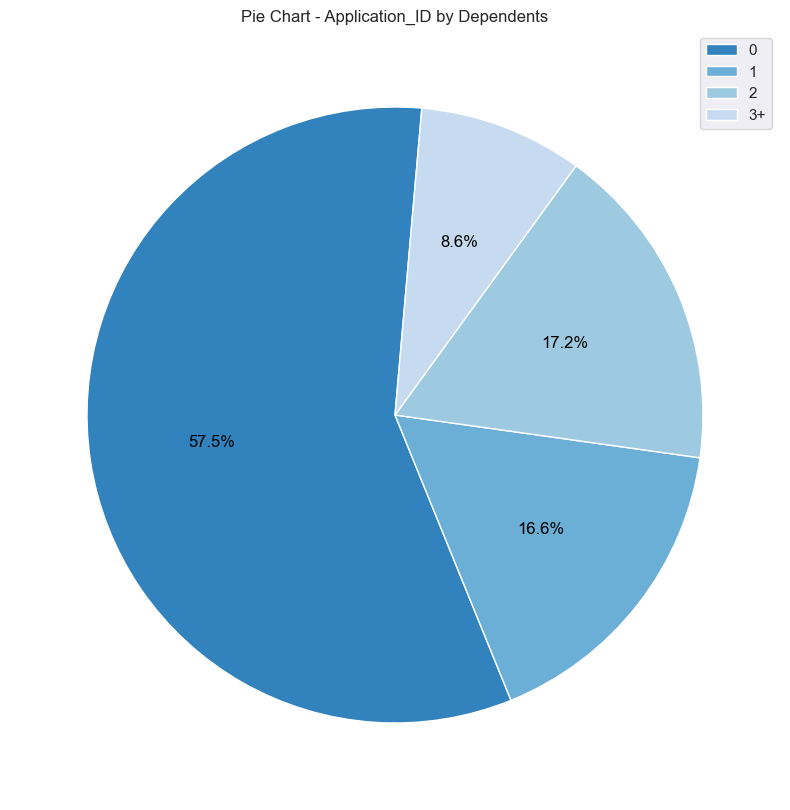

In [4]:
plt.figure(figsize=(10, 10))

plt.pie(sol_1.Application_ID, autopct='%1.1f%%', startangle=85, textprops=dict(color='black'))

plt.title('Pie Chart - Application_ID by Dependents')
plt.legend(loc='upper right', labels=list(sol_1.Dependents))

plt.show()

### 2.  Find the average number of dependents per applicant

In [5]:
# Replacing "+" with ''
# Then converting coulumn from 'object' to 'int' dtypes. 

loan_data.Dependents = loan_data.Dependents.apply( lambda x: x.replace('+', '') ).astype(int)

loan_data.Dependents

0      0
1      1
2      0
3      0
4      0
      ..
506    0
507    3
508    1
509    2
510    0
Name: Dependents, Length: 511, dtype: int32

In [6]:
average_dependent_per_applicant = loan_data.Dependents.sum()/loan_data.shape[0]

average_dependent_per_applicant

0.7690802348336595

### 3. Find the %of applications approved for self-employed applicants

In [7]:
sol_3 = loan_data.groupby(['Application_Status', 'Self_Employed' ])[['Application_ID']].count()/loan_data.shape[0]*100



sol_3 = sol_3.reset_index()


sol_3

Application_Status Self_Employed  Application_ID
0                  N            No       27.397260
1                  N           Yes        4.696673
2                  Y            No       58.904110
3                  Y           Yes        9.001957

In [8]:
# Creating dataframe for pie chart visualization

dummy_df_for_p3 = pd.DataFrame(data={ 'dummy_column':[0, 100]})
dummy_df_for_p3

dummy_column
0             0
1           100

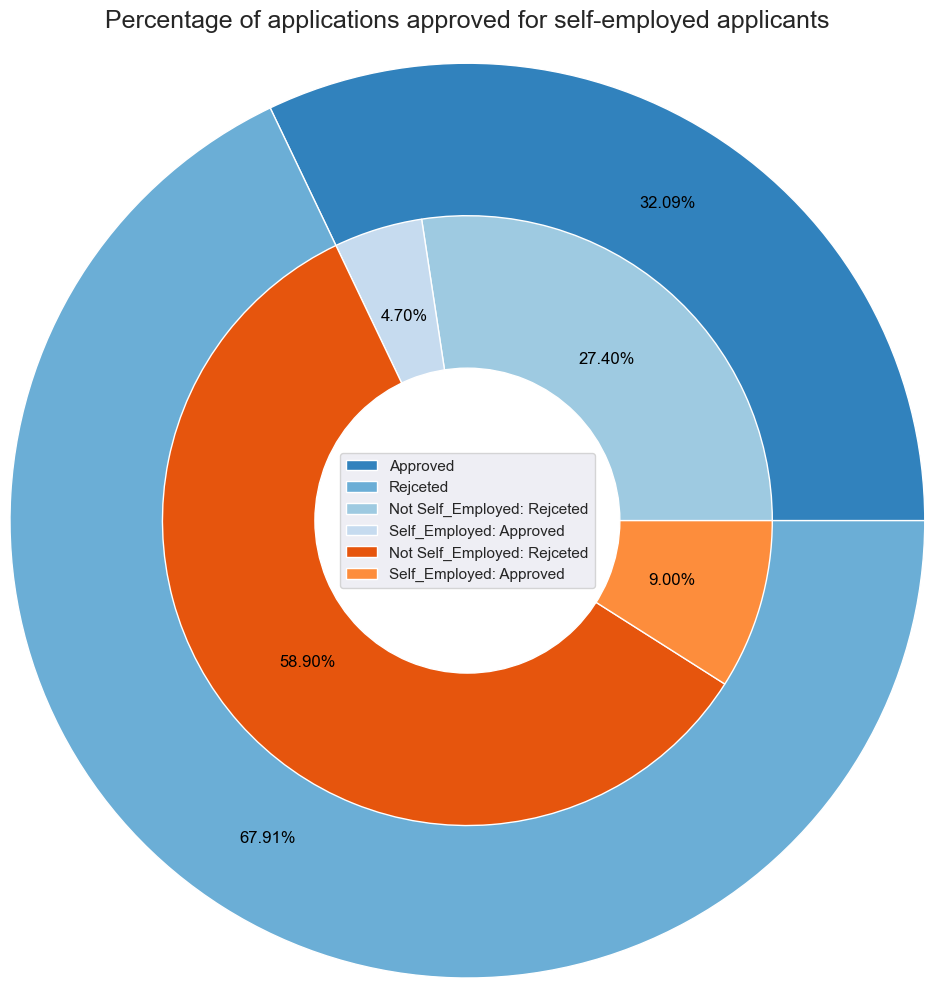

In [9]:
plt.figure(figsize=(11,11))

plt.pie(x=(sol_3.groupby('Application_Status')[['Application_ID']].sum()).Application_ID,
       autopct='%.2f%%', radius=1.35,
       labeldistance=0.90
       , pctdistance=0.82
       ,textprops=dict(color='black', ha='center', va='center', fontsize='12'))



plt.pie(x=sol_3.Application_ID,autopct='%.2f%%', radius=0.9
        ,textprops=dict(color='black', ha='center', va='center', fontsize='12')
       , pctdistance=0.7, shadow=True)


plt.pie(x=dummy_df_for_p3.dummy_column, radius=0.45, colors='w',shadow=True, wedgeprops=dict(edgecolor='w'))
plt.legend(loc=10, labels=['Approved', 'Rejceted', 'Not Self_Employed: Rejceted',
                          'Self_Employed: Approved', 'Not Self_Employed: Rejceted', 'Self_Employed: Approved'])

plt.title('Percentage of applications approved for self-employed applicants', fontsize=18, pad=50)
plt.show()

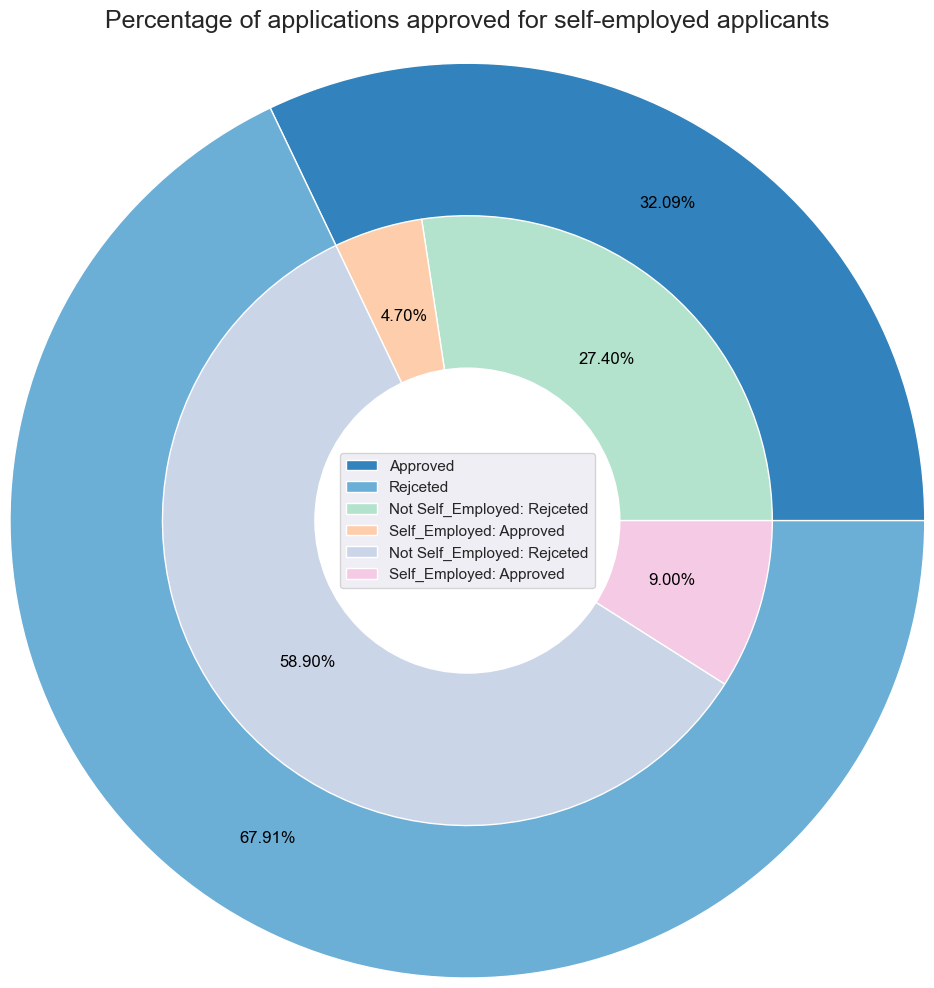

In [10]:
plt.figure(figsize=(11,11))

plt.pie(x=(sol_3.groupby('Application_Status')[['Application_ID']].sum()).Application_ID,
       autopct='%.2f%%', radius=1.35,
       labeldistance=0.90
       ,colors=plt.cm.tab20c.colors, pctdistance=0.82
       ,textprops=dict(color='black', ha='center', va='center', fontsize='12'))



plt.pie(x=sol_3.Application_ID,autopct='%.2f%%', radius=0.9
        ,textprops=dict(color='black', ha='center', va='center', fontsize='12')
       ,colors=plt.cm.Pastel2.colors, pctdistance=0.7, shadow=True)


plt.pie(x=dummy_df_for_p3.dummy_column, radius=0.45, colors='w',shadow=True, wedgeprops=dict(edgecolor='w'))
plt.legend(loc=10, labels=['Approved', 'Rejceted', 'Not Self_Employed: Rejceted',
                          'Self_Employed: Approved', 'Not Self_Employed: Rejceted', 'Self_Employed: Approved'])

plt.title('Percentage of applications approved for self-employed applicants', fontsize=18, pad=50)
plt.show()

In [11]:
sol_3['Application_Status_dummy'] = np.where(sol_3.Application_Status == 'N', 'Rejected', 'Approved')
sol_3['Self_Employed_dummy'] = np.where(sol_3.Self_Employed == 'No', 'Not_Self_employed', 'Self_employed')
sol_3

Application_Status Self_Employed  Application_ID Application_Status_dummy  \
0                  N            No       27.397260                 Rejected   
1                  N           Yes        4.696673                 Rejected   
2                  Y            No       58.904110                 Approved   
3                  Y           Yes        9.001957                 Approved   

  Self_Employed_dummy  
0   Not_Self_employed  
1       Self_employed  
2   Not_Self_employed  
3       Self_employed

In [12]:
sol_3['Application_Status_Self_Employed'] = sol_3.Application_Status_dummy + ': ' + sol_3.Self_Employed_dummy
sol_3.drop(columns=['Application_Status_dummy', 'Self_Employed_dummy'], inplace=True)
sol_3

Application_Status Self_Employed  Application_ID  \
0                  N            No       27.397260   
1                  N           Yes        4.696673   
2                  Y            No       58.904110   
3                  Y           Yes        9.001957   

  Application_Status_Self_Employed  
0      Rejected: Not_Self_employed  
1          Rejected: Self_employed  
2      Approved: Not_Self_employed  
3          Approved: Self_employed

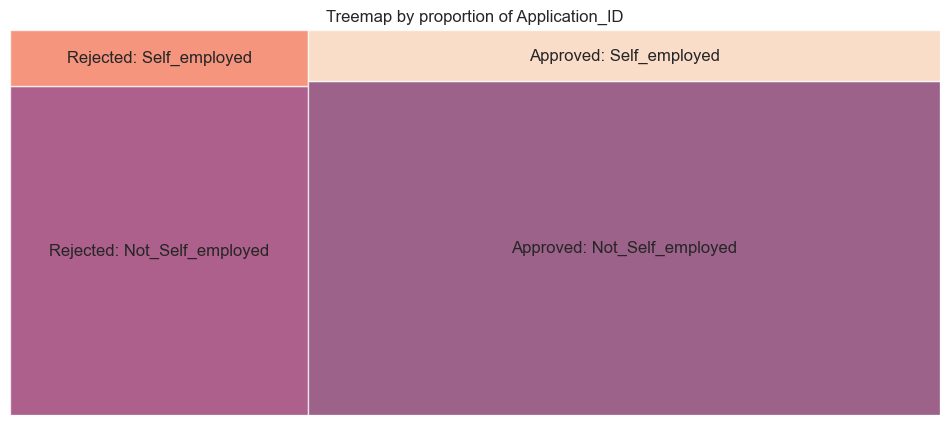

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
squarify.plot(sizes=sol_3.Application_ID, label=sol_3.Application_Status_Self_Employed, alpha=0.7, ax=ax)

# Add labels
plt.title("Treemap by proportion of Application_ID")
plt.axis('off')
plt.show()

In [14]:
#create plotly figure
fig = plotly.graph_objs.Figure()
fig.add_trace(plotly.graph_objs.Treemap(
   labels = sol_3.Application_Status_Self_Employed,
   parents = ['All']*len(sol_3.Application_Status_Self_Employed),
   values = sol_3.Application_ID
))
#show figure
fig.show()

### 4. What is the % of rejections for married male applicants

In [15]:
sol_4 = loan_data.groupby(['Application_Status', 'Married', 'Gender'])[['Application_ID']].count() / loan_data.shape[0] * 100

sol_4

Application_ID
Application_Status Married Gender                
N                  No      Female        5.088063
                           Male          8.414873
                   Yes     Female        1.565558
                           Male         17.025440
Y                  No      Female        7.827789
                           Male         13.894325
                   Yes     Female        3.326810
                           Male         42.857143

In [16]:
sol_4 = sol_4.reset_index()

sol_4

Application_Status Married  Gender  Application_ID
0                  N      No  Female        5.088063
1                  N      No    Male        8.414873
2                  N     Yes  Female        1.565558
3                  N     Yes    Male       17.025440
4                  Y      No  Female        7.827789
5                  Y      No    Male       13.894325
6                  Y     Yes  Female        3.326810
7                  Y     Yes    Male       42.857143

In [17]:
sol_4 = sol_4[(sol_4.Gender == 'Male') & (sol_4.Married == 'Yes') & (sol_4.Application_Status == 'N')]

sol_4

Application_Status Married Gender  Application_ID
3                  N     Yes   Male        17.02544

In [18]:
print("% of rejections for married male applicants", sol_4.iloc[:, 3])

% of rejections for married male applicants 3    17.02544
Name: Application_ID, dtype: float64


### 5. Which property area has the maximum approval ratio

In [19]:
sol_5_a = loan_data.groupby(['Property_Area'])[['Application_ID']].count()

sol_5_a

Application_ID
Property_Area                
Rural                     149
Semiurban                 197
Urban                     165

In [20]:
sol_5_b = loan_data.groupby(['Property_Area', 'Application_Status'])[['Application_ID']].count()

sol_5_b

Application_ID
Property_Area Application_Status                
Rural         N                               59
              Y                               90
Semiurban     N                               44
              Y                              153
Urban         N                               61
              Y                              104

In [21]:
sol_5 = (sol_5_b/sol_5_a).reset_index()

sol_5

Property_Area Application_Status  Application_ID
0         Rural                  N        0.395973
1         Rural                  Y        0.604027
2     Semiurban                  N        0.223350
3     Semiurban                  Y        0.776650
4         Urban                  N        0.369697
5         Urban                  Y        0.630303

In [22]:
sol_5 = sol_5[sol_5.Application_ID == sol_5.Application_ID.max()].iloc[:,2] *100

In [23]:
print('property area having the maximum approval ratio', sol_5)

property area having the maximum approval ratio 3    77.664975
Name: Application_ID, dtype: float64


### 6. Find average dependents per income group

In [24]:
sol_6 = loan_data.groupby(['Income'])[['Dependents']].mean()


sol_6

Dependents
Income            
high      0.888889
low       0.641026
medium    0.922280

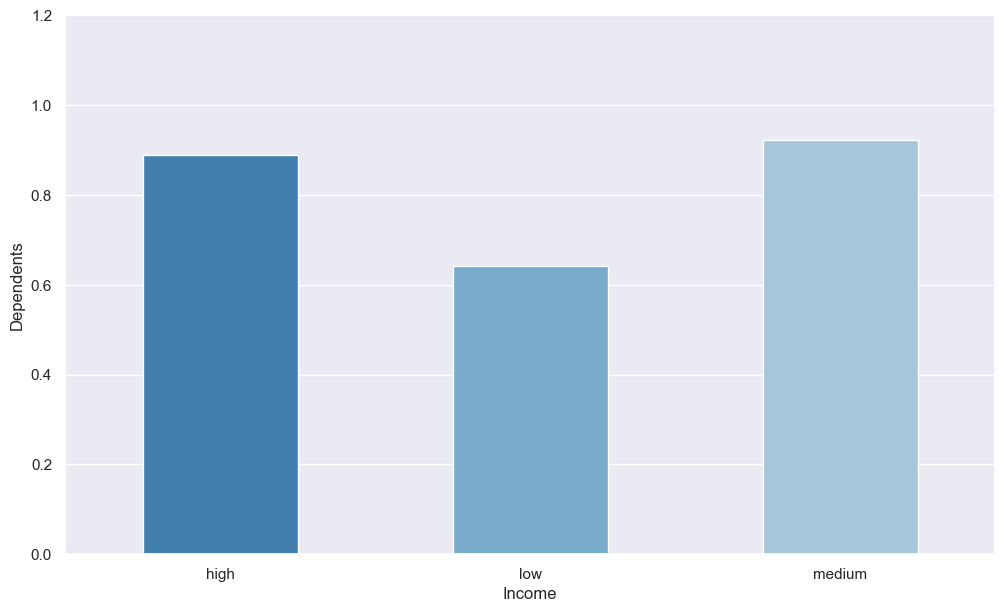

In [25]:
plt.figure(figsize=(12,7))
sns.barplot(data=sol_6, y=sol_6.Dependents, x=sol_6.index, width=0.5)
plt.ylim(top=1.2, bottom=0)
plt.show()

### 7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score

In [26]:
loan_data.head(1)

Application_ID Gender Married  Dependents Education Self_Employed  \
0       LP001002   Male      No           0  Graduate            No   

   Credit_History Property_Area  Income Application_Status  
0               1         Urban  medium                  Y

In [27]:
loan_data.info()

# No nulls

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    int32 
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int32(1), int64(1), object(8)
memory usage: 41.9+ KB


In [28]:
loan_data.duplicated().sum()
# no duplicates

0

In [29]:
# value_counts of Application_ID

print(loan_data.Application_ID.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of gender

print(loan_data.Gender.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of Married

print(loan_data.Married.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of Dependents

print(loan_data.Dependents.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of Self_Employed

print(loan_data.Self_Employed.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of Education

print(loan_data.Education.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of Credit_History

print(loan_data.Credit_History.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of Property_Area

print(loan_data.Property_Area.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of Income

print(loan_data.Income.value_counts())

print("_______________________________________________________________________________________________________")
print("")

# value_counts of Education

print(loan_data.Application_Status.value_counts())
print("_______________________________________________________________________________________________________")



Application_ID
LP001002    1
LP002300    1
LP002342    1
LP002341    1
LP002337    1
           ..
LP001665    1
LP001664    1
LP001658    1
LP001657    1
LP002990    1
Name: count, Length: 511, dtype: int64
_______________________________________________________________________________________________________

Gender
Male      420
Female     91
Name: count, dtype: int64
_______________________________________________________________________________________________________

Married
Yes    331
No     180
Name: count, dtype: int64
_______________________________________________________________________________________________________

Dependents
0    294
2     88
1     85
3     44
Name: count, dtype: int64
_______________________________________________________________________________________________________

Self_Employed
No     441
Yes     70
Name: count, dtype: int64
_______________________________________________________________________________________________________

Education
Gradu

In [30]:
for col in loan_data.columns:
    print('Column:', col, 'Number of unique values:', loan_data[col].nunique())

    
# Cardinality of column Application_ID is 511 which is very high.

Column: Application_ID Number of unique values: 511
Column: Gender Number of unique values: 2
Column: Married Number of unique values: 2
Column: Dependents Number of unique values: 4
Column: Education Number of unique values: 2
Column: Self_Employed Number of unique values: 2
Column: Credit_History Number of unique values: 2
Column: Property_Area Number of unique values: 3
Column: Income Number of unique values: 3
Column: Application_Status Number of unique values: 2


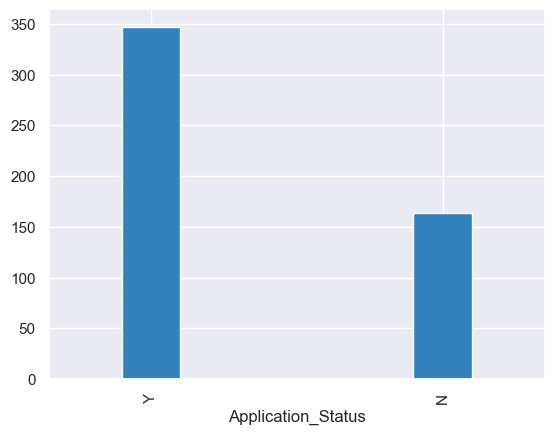

In [31]:
loan_data.loc[:, 'Application_Status'].value_counts().plot(kind='bar', width=0.2)
plt.show()

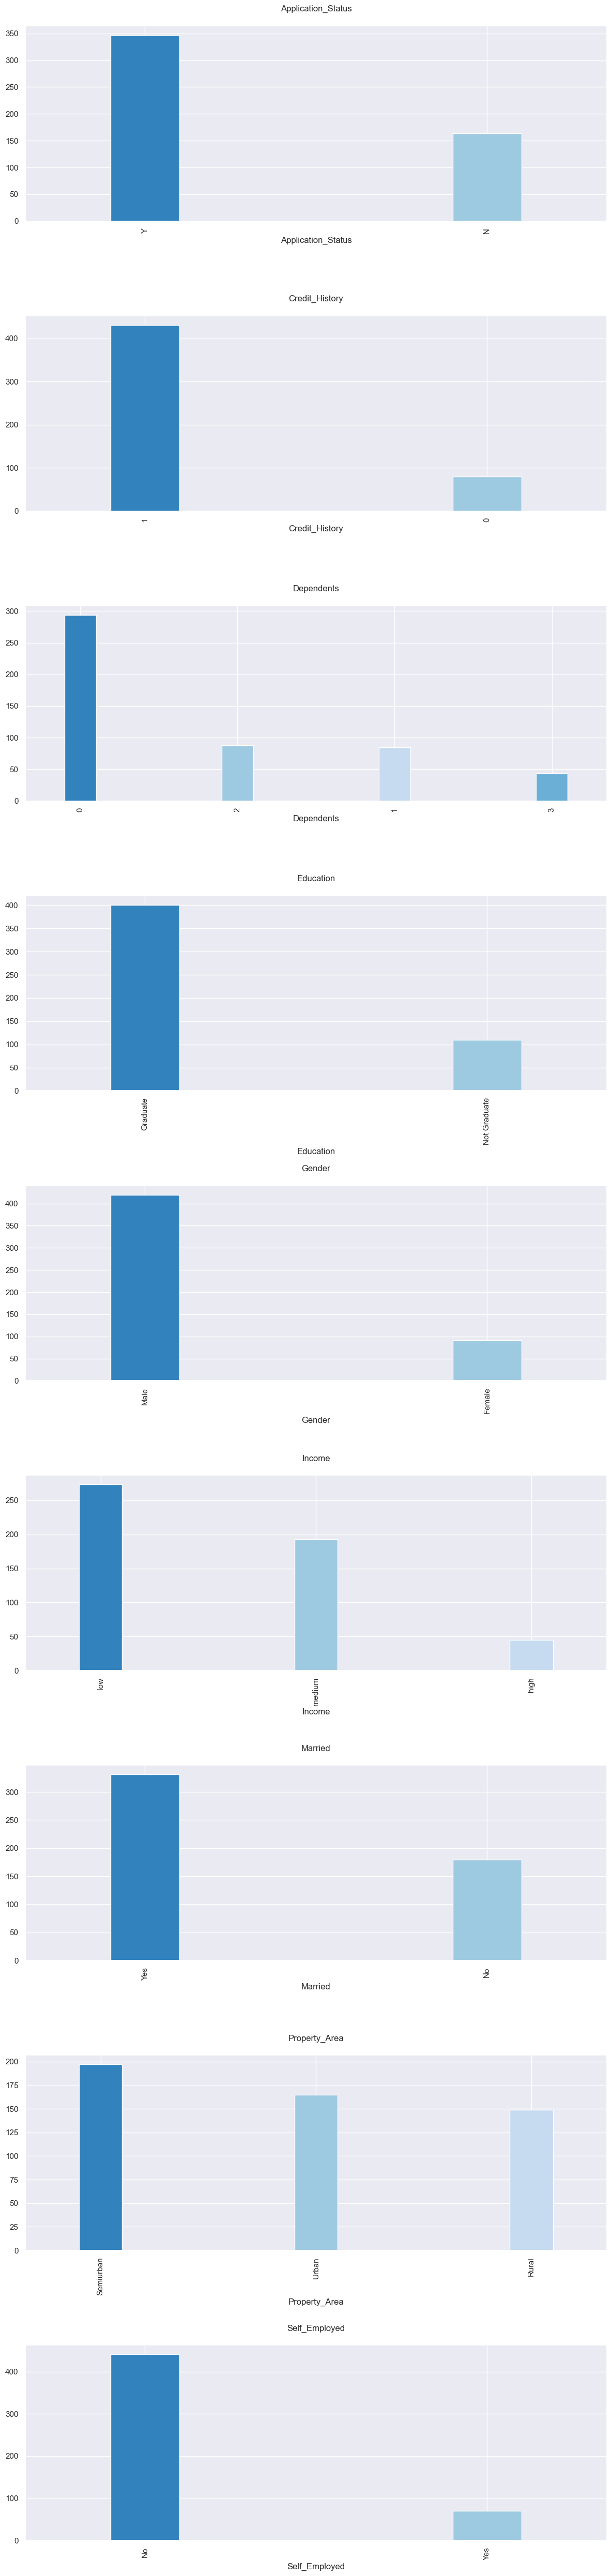

In [32]:
# Visualizaion

# As cardinality of "Application_ID" is very high, we will not use this in this visualization


fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(12, 50))
#axes = axes.flatten()

custom_colors = ['#e6a943', '#c9c016', '#6ec916', '#16c9b1', '#b640e7', '#e8a7e1', '#abe8a7', '#d3d4ed', 'lightcoral']

for i, j, k in zip(loan_data.columns.difference(['Application_ID']), axes, custom_colors):
    #sns.palplot('pastel')
    
    
    loan_data.loc[:, i].value_counts().plot(kind='bar', ax=j, width=0.2, color=['#3182BD', '#9ECAE1', '#C6DBEF','#6BAED6'])
    j.set_title(i, pad=20)
    
plt.tight_layout()
plt.show()



In [33]:
# Balanced data

loan_data.Application_Status.value_counts()/ loan_data.Application_Status.count()

Application_Status
Y    0.679061
N    0.320939
Name: count, dtype: float64

In [34]:
# Datatype conversion of variables "Credit_History" and "Dependents" from "int" to "object"


loan_data.loc[:, ['Credit_History', 'Dependents']] = loan_data.loc[:, ['Credit_History', 'Dependents']].astype("object")


loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    object
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: object(10)
memory usage: 43.9+ KB


In [35]:
# Describing x-variables


loan_data.loc[:, loan_data.columns.difference(['Application_Status'])].describe().T

count unique        top freq
Application_ID   511    511   LP001002    1
Credit_History   511      2          1  431
Dependents       511      4          0  294
Education        511      2   Graduate  401
Gender           511      2       Male  420
Income           511      3        low  273
Married          511      2        Yes  331
Property_Area    511      3  Semiurban  197
Self_Employed    511      2         No  441

In [36]:
# y- variable is "Application_Status"

# No nulls available

# No duplicates available

# All x-variables are categotical in nature as cardinality is too low.

# Data is already summerized at the level of analysis.

# As no continous variable avilable so no need for outlier treatment.

# Filteration is also not needed.

# Column names are already following naming convetion.

# "Group and Bins" not required as except column "Application_ID", cardinality is already very low.

# As no continous variable avilable so there will not be any "Calculated variables" or "ratios"

# No need of variable "Application_ID" as variable having no significance in the analysis.

# ---Datatype conversion is needed to variables "Credit_History" and "Dependents" from "int" to "object"--done already

In [37]:
# Creating an new DataFrame for the analysis having all variables except "Application_ID"


df = loan_data[loan_data.columns.difference(['Application_ID'])]

df.head(1)

Application_Status Credit_History Dependents Education Gender  Income  \
0                  Y              1          0  Graduate   Male  medium   

  Married Property_Area Self_Employed  
0      No         Urban            No

In [38]:
# Label encoding for y-variable

df.Application_Status = np.where(df.Application_Status == 'Y', 1, 0)


df.head()

Application_Status Credit_History Dependents     Education Gender  Income  \
0                   1              1          0      Graduate   Male  medium   
1                   0              1          1      Graduate   Male  medium   
2                   1              1          0      Graduate   Male     low   
3                   1              1          0  Not Graduate   Male     low   
4                   1              1          0      Graduate   Male  medium   

  Married Property_Area Self_Employed  
0      No         Urban            No  
1     Yes         Rural            No  
2     Yes         Urban           Yes  
3     Yes         Urban            No  
4      No         Urban            No

In [39]:
# seprating x and y variables

y_var = 'Application_Status'


x_var = list(df.columns.difference(['Application_Status']))


print("y_var : ", y_var)
print("x_var : ", x_var)

y_var :  Application_Status
x_var :  ['Credit_History', 'Dependents', 'Education', 'Gender', 'Income', 'Married', 'Property_Area', 'Self_Employed']


###### Dummy variable creation

In [40]:
df_dummies = pd.get_dummies(df.loc[:,x_var], drop_first=True).astype(int)


df_dummies

Credit_History_1  Dependents_1  Dependents_2  Dependents_3  \
0                   1             0             0             0   
1                   1             1             0             0   
2                   1             0             0             0   
3                   1             0             0             0   
4                   1             0             0             0   
..                ...           ...           ...           ...   
506                 1             0             0             0   
507                 1             0             0             1   
508                 1             1             0             0   
509                 1             0             1             0   
510                 0             0             0             0   

     Education_Not Graduate  Gender_Male  Income_low  Income_medium  \
0                         0            1           0              1   
1                         0            1           0              1   
2                         0            1           1              0   
3                         1            1           1              0   
4                         0            1           0              1   
..                      ...          ...         ...            ...   
506                       0            0           1              0   
507                       0            1           0              1   
508                       0            1           0              1   
509                       0            1           0              1   
510                       0            0           0              1   

     Married_Yes  Property_Area_Semiurban  Property_Area_Urban  \
0              0                        0                    1   
1              1                        0                    0   
2              1                        0                    1   
3              1                        0                    1   
4              0                        0                    1   
..           ...                      ...                  ...   
506            0                        0                    0   
507            1                        0                    0   
508            1                        0                    1   
509            1                        0                    1   
510            0                        1                    0   

     Self_Employed_Yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
..                 ...  
506                  0  
507                  0  
508                  0  
509                  0  
510                  1  

[511 rows x 12 columns]

In [41]:
# Correcting variable names in df_dummies


df_dummies.columns = df_dummies.columns.str.replace(" ", "_")


df_dummies.columns

Index(['Credit_History_1', 'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Not_Graduate', 'Gender_Male', 'Income_low', 'Income_medium',
       'Married_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Self_Employed_Yes'],
      dtype='object')

In [42]:
# New x_var 


x_var = list(df_dummies.columns)


x_var

['Credit_History_1',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3',
 'Education_Not_Graduate',
 'Gender_Male',
 'Income_low',
 'Income_medium',
 'Married_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Self_Employed_Yes']

In [43]:
# Concating both x and y variables to create new dataframe as df


df = pd.concat([df.Application_Status, df_dummies], axis=1)


df.head(1)

Application_Status  Credit_History_1  Dependents_1  Dependents_2  \
0                   1                 1             0             0   

   Dependents_3  Education_Not_Graduate  Gender_Male  Income_low  \
0             0                       0            1           0   

   Income_medium  Married_Yes  Property_Area_Semiurban  Property_Area_Urban  \
0              1            0                        0                    1   

   Self_Employed_Yes  
0                  0

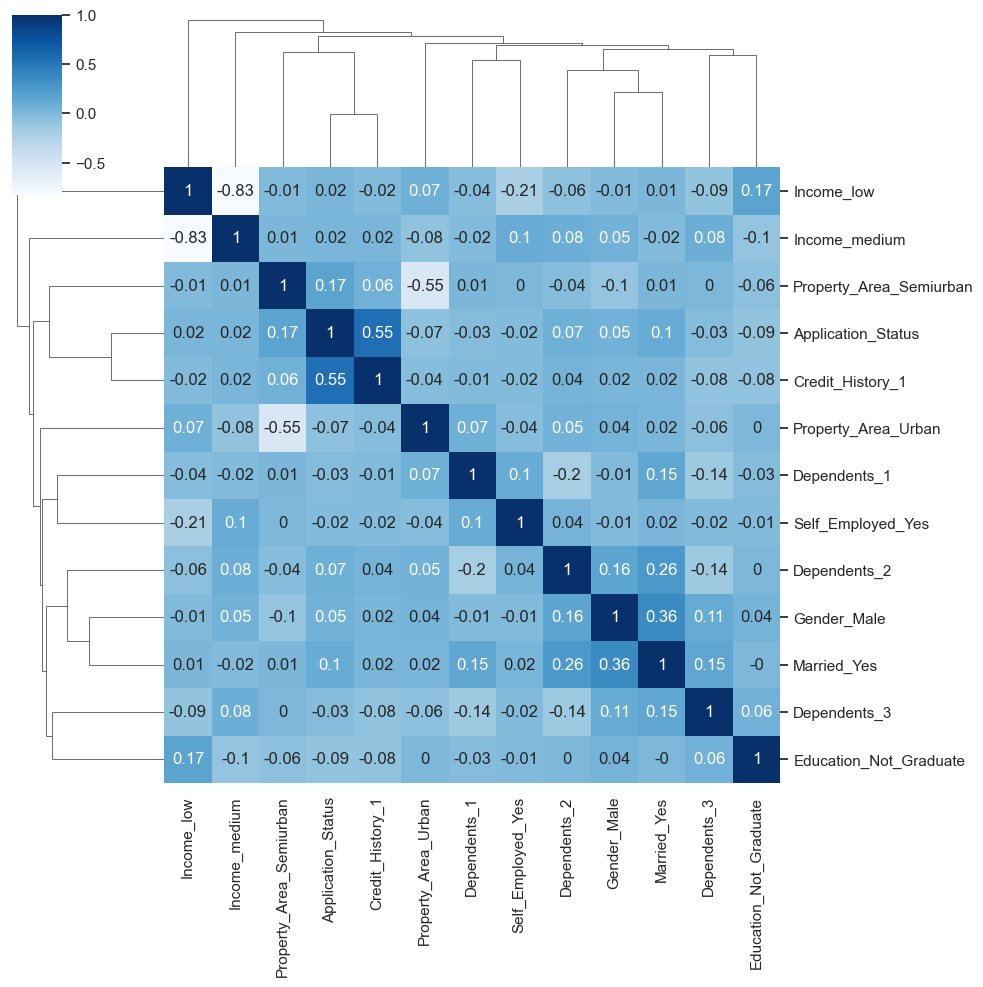

In [44]:
#Visualization

#plt.figure(figsize=(8,8))
sns.clustermap(df.corr().round(2), annot=True, cmap='Blues')
plt.show()


###### Variable Selection

In [45]:
# Using somars'D

import statsmodels.formula.api as smf

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [46]:
roc_df = pd.DataFrame()

for i in x_var:
    
    model = smf.logit(formula='Application_Status ~ ' + i, data=df).fit()
    
    y_pred = model.predict(df)
    
    roc_sc = roc_auc_score(df.Application_Status, y_pred)
    
    somars_D = (2*roc_sc -1)
    
    temp_df = pd.DataFrame([i, roc_sc, somars_D]).T
    
    roc_df = pd.concat([roc_df, temp_df], axis =0)

    
# Correcting column names

roc_df.columns = ['features', 'roc_sc', 'somars_D']

print('__________________________________________________________________________________________')
print(roc_df)

Optimization terminated successfully.
         Current function value: 0.481213
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627113
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625086
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627189
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.623744
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626223
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627334
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627434
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.622778
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.613455
  

In [112]:
somars_D_list = list(roc_df.loc[roc_df.somars_D >= 0.2, 'features'])


print('somars_D_list')

somars_D_list


In [48]:
'''It is showing only one variables as "somars_D_list" for the further analysis, so using SelectKBest to get more column names'''

'It is showing only one variables as "somars_D_list" for the further analysis, so using SelectKBest to get more column names'

In [49]:
# Using SelectKBest


from sklearn.feature_selection import SelectKBest, f_classif

In [50]:
skb = SelectKBest(score_func=f_classif, k=5)


skb.fit_transform(df.loc[:, x_var], df.loc[:, y_var])

array([[1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1],
       ...,
       [1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0]])

In [51]:
skb_list = list(skb.get_feature_names_out())

skb_list

['Credit_History_1',
 'Education_Not_Graduate',
 'Married_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [52]:
# Combining the "somars_D_list" and "skb_list" to get single list with unique variables only.


list_new = list(set(somars_D_list + skb_list))


list_new

['Credit_History_1',
 'Education_Not_Graduate',
 'Property_Area_Urban',
 'Property_Area_Semiurban',
 'Married_Yes']

In [53]:
# Creating formulae to be use in VIF


form_0 = 'Application_Status ~ ' + ' + '.join(list_new)


form_0

'Application_Status ~ Credit_History_1 + Education_Not_Graduate + Property_Area_Urban + Property_Area_Semiurban + Married_Yes'

In [54]:
# Removing multi-collieraity using vif


from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [55]:
vif = pd.DataFrame()


Y, X = dmatrices(form_0, df, return_type='dataframe')

In [56]:
vif['columns'] = X.columns

vif['vif_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [57]:
print(vif)

print('_____________________________________________________________________')

var_list = list(vif[1:].loc[vif.vif_factor <= 4, 'columns'])



print(var_list)

                   columns  vif_factor
0                Intercept   10.825455
1         Credit_History_1    1.009836
2   Education_Not_Graduate    1.010433
3      Property_Area_Urban    1.429984
4  Property_Area_Semiurban    1.438533
5              Married_Yes    1.001426
_____________________________________________________________________
['Credit_History_1', 'Education_Not_Graduate', 'Property_Area_Urban', 'Property_Area_Semiurban', 'Married_Yes']


In [58]:
# Formula creation for modelling


form_1 = 'Application_Status ~ ' + ' + '.join(var_list)


form_1

'Application_Status ~ Credit_History_1 + Education_Not_Graduate + Property_Area_Urban + Property_Area_Semiurban + Married_Yes'

###### Train-Test split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train, test = train_test_split(df[var_list + ['Application_Status']], random_state=1)

In [61]:
print('train', train.shape)
print('test', test.shape)

train (383, 6)
test (128, 6)


##### Model using all variables to check the impact of all variables on data

In [62]:
# Formulae creation


form = 'Application_Status ~ ' + ' + '.join(x_var)


form

'Application_Status ~ Credit_History_1 + Dependents_1 + Dependents_2 + Dependents_3 + Education_Not_Graduate + Gender_Male + Income_low + Income_medium + Married_Yes + Property_Area_Semiurban + Property_Area_Urban + Self_Employed_Yes'

In [63]:
mod = smf.logit(form, df).fit()

print(mod.summary2())

# P>|z| of "Education_Not_Graduate" is 0.7003, this is not significant variable, let's drop this in next model

Optimization terminated successfully.
         Current function value: 0.456246
         Iterations 6
                            Results: Logit
Model:                Logit               Method:            MLE       
Dependent Variable:   Application_Status  Pseudo R-squared:  0.273     
Date:                 2024-02-04 15:04    AIC:               492.2835  
No. Observations:     511                 BIC:               547.3563  
Df Model:             12                  Log-Likelihood:    -233.14   
Df Residuals:         498                 LL-Null:           -320.69   
Converged:            1.0000              LLR p-value:       4.3165e-31
No. Iterations:       6.0000              Scale:             1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -3.7949   0.6376 -5.9517 0.0000 -5.0446

In [64]:
# Analysis:

'''This model is vary unstable. As per this model maximum of the variables are insignificant and having P>|z| > 0.04.
Pseudo R-squared:  0.273, which is manageable.'''


# We need to create model with selected variables only

'This model is vary unstable. As per this model maximum of the variables are insignificant and having P>|z| > 0.04.\nPseudo R-squared:  0.273, which is manageable.'

# "Statistical modelling" --  Modelling using "logit"

In [65]:
# Model 1


In [66]:
form_1

'Application_Status ~ Credit_History_1 + Education_Not_Graduate + Property_Area_Urban + Property_Area_Semiurban + Married_Yes'

In [67]:
mod_1 = smf.logit(form_1, train).fit()

print(mod_1.summary2())

# P>|z| of "Education_Not_Graduate" is 0.7003, this is not significant variable, let's drop this in next model

Optimization terminated successfully.
         Current function value: 0.460946
         Iterations 6
                            Results: Logit
Model:                Logit               Method:            MLE       
Dependent Variable:   Application_Status  Pseudo R-squared:  0.261     
Date:                 2024-02-04 15:04    AIC:               365.0849  
No. Observations:     383                 BIC:               388.7731  
Df Model:             5                   Log-Likelihood:    -176.54   
Df Residuals:         377                 LL-Null:           -238.90   
Converged:            1.0000              LLR p-value:       3.1431e-25
No. Iterations:       6.0000              Scale:             1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -2.9270   0.5251 -5.5737 0.0000 -3.9563

In [68]:
# Model 2

In [69]:
form_2 = 'Application_Status ~ Property_Area_Urban + Married_Yes + Credit_History_1 + Property_Area_Semiurban'

In [70]:
mod_2 = smf.logit(form_2, train).fit()

print(mod_2.summary2())

# P>|z| of "Property_Area_Urban" is 0.6021, this is not significant variable, let's drop this in next model

Optimization terminated successfully.
         Current function value: 0.461138
         Iterations 6
                            Results: Logit
Model:                Logit               Method:            MLE       
Dependent Variable:   Application_Status  Pseudo R-squared:  0.261     
Date:                 2024-02-04 15:04    AIC:               363.2317  
No. Observations:     383                 BIC:               382.9719  
Df Model:             4                   Log-Likelihood:    -176.62   
Df Residuals:         378                 LL-Null:           -238.90   
Converged:            1.0000              LLR p-value:       5.6419e-26
No. Iterations:       6.0000              Scale:             1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -2.9670   0.5161 -5.7488 0.0000 -3.9786

In [71]:
# Model 3

In [72]:
form_3 = 'Application_Status ~ Married_Yes + Credit_History_1 + Property_Area_Semiurban'

In [73]:
mod_3 = smf.logit(form_3, train).fit()

print(mod_3.summary2())

# P>|z| of "Married_Yes" is 0.0696, this is not significant variable, let's drop this in next model

Optimization terminated successfully.
         Current function value: 0.461493
         Iterations 6
                            Results: Logit
Model:                Logit               Method:            MLE       
Dependent Variable:   Application_Status  Pseudo R-squared:  0.260     
Date:                 2024-02-04 15:04    AIC:               361.5038  
No. Observations:     383                 BIC:               377.2960  
Df Model:             3                   Log-Likelihood:    -176.75   
Df Residuals:         379                 LL-Null:           -238.90   
Converged:            1.0000              LLR p-value:       9.1588e-27
No. Iterations:       6.0000              Scale:             1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -2.8881   0.4931 -5.8571 0.0000 -3.8546

In [74]:
# Model 4

In [75]:
form_4 = 'Application_Status ~ Credit_History_1 + Property_Area_Semiurban'

In [76]:
mod_4 = smf.logit(form_4, train).fit()

print(mod_4.summary2())



'''
Now, All the variables are significant
Pseudo R-squared:  0.253
'''

Optimization terminated successfully.
         Current function value: 0.465747
         Iterations 6
                            Results: Logit
Model:                Logit               Method:            MLE       
Dependent Variable:   Application_Status  Pseudo R-squared:  0.253     
Date:                 2024-02-04 15:04    AIC:               362.7625  
No. Observations:     383                 BIC:               374.6066  
Df Model:             2                   Log-Likelihood:    -178.38   
Df Residuals:         380                 LL-Null:           -238.90   
Converged:            1.0000              LLR p-value:       5.2099e-27
No. Iterations:       6.0000              Scale:             1.0000    
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -2.5786   0.4585 -5.6239 0.0000 -3.4772

'\nNow, All the variables are significant\nPseudo R-squared:  0.253\n'

In [77]:
# Prediction using this model 4


y_pred_train = mod_4.predict(train)
y_pred_test = mod_4.predict(test)

In [78]:
train_pred = pd.concat([train.Application_Status, y_pred_train], axis=1)
test_pred = pd.concat([test.Application_Status, y_pred_test], axis=1)

train_pred.columns = ['y_actual', 'y_prob']
test_pred.columns = ['y_actual', 'y_prob']

print(train_pred.head())
print('_______________________________________________________')
print(test_pred.head())

     y_actual    y_prob
507         1  0.744507
173         1  0.872608
80          1  0.872608
46          0  0.070530
246         1  0.872608
_______________________________________________________
     y_actual    y_prob
47          1  0.872608
345         1  0.744507
284         0  0.744507
221         1  0.872608
502         0  0.744507


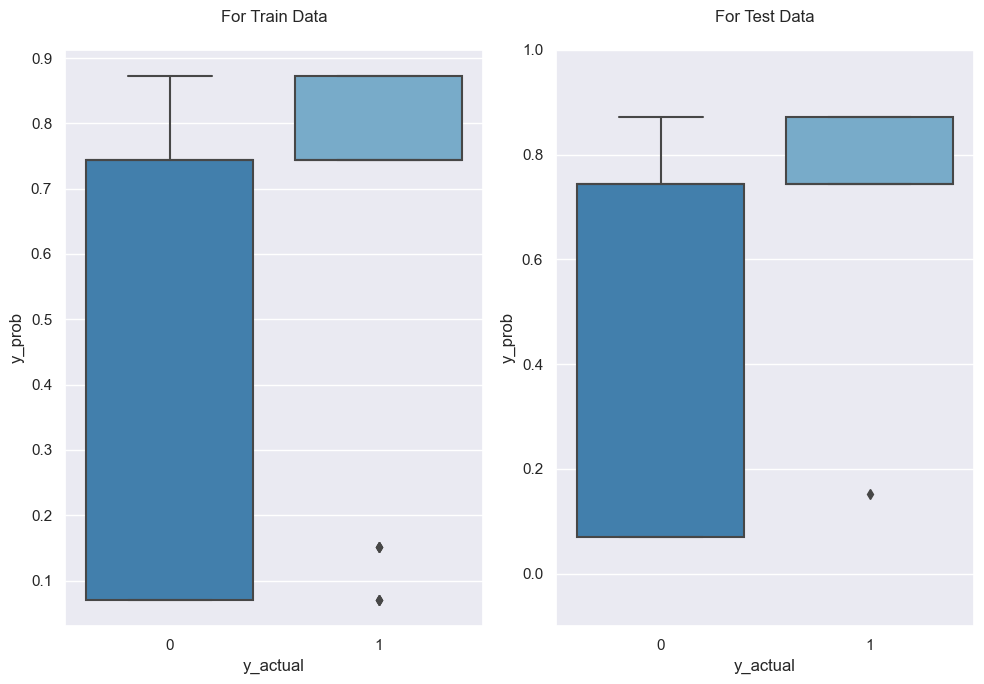

In [79]:
# Visualization

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,7))
sns.boxplot(x='y_actual', y='y_prob', data=train_pred, ax=ax[0])
ax[0].set_title('For Train Data', pad=20)


sns.boxplot(x='y_actual', y='y_prob', data=test_pred, ax=ax[1])
ax[1].set_title('For Test Data', pad=20)
plt.ylim(top=1, bottom=-0.1)
plt.tight_layout()
plt.show()


In [80]:
# empty dataframe to store the information
cm_scores = pd.DataFrame()

# run the loop for different proba values
for prob_val in np.arange( 0, 1.01, 0.01 ):
    
    # get the y_pred
    train_pred['y_pred'] = np.where( train_pred.y_prob >= prob_val, 1, 0 )
    
    # get the confusion matrix
    cm = confusion_matrix( train_pred.y_actual, train_pred.y_pred )[::-1, ::-1]

    # get the metric values
    tp = cm[0, 0]
    tn = cm[1, 1]
    fp = cm[1, 0]
    fn = cm[0, 1]

    accuracy = (tp + tn) / cm.sum()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    s_s = tpr + 1 - fpr
    
    # store the data in temp dataframe
    temp_df = pd.DataFrame([prob_val, tp, tn, fp, fn, accuracy, tpr, fpr, s_s]).T
    
    # add the data to final dataframe
    cm_scores = pd.concat([cm_scores, temp_df], axis = 0 )
    
# add the column names
cm_scores.columns = ['prob_val', 'tp', 'tn', 'fp', 'fn', 'accuracy', 'tpr', 'fpr', 's_s']

# get the best cutoff
best_cutoff = cm_scores.loc[ cm_scores.accuracy == cm_scores.accuracy.max(), 'prob_val'][0]
print('best_cutoff: ', list(best_cutoff.round(2)))

print('______________________________')

print('best_cutoff.shape', best_cutoff.shape)

best_cutoff:  [0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74]
______________________________
best_cutoff.shape (59,)


In [81]:
train_pred['y_pred'] = np.where(best_cutoff.iloc[:1][0] >= train_pred.y_prob, 0,1)

print(train_pred.head())

print('____________________________________________________________________________')

test_pred['y_pred'] = np.where(best_cutoff.iloc[:1][0] >= test_pred.y_prob, 0,1)

print(test_pred.head())

     y_actual    y_prob  y_pred
507         1  0.744507       1
173         1  0.872608       1
80          1  0.872608       1
46          0  0.070530       0
246         1  0.872608       1
____________________________________________________________________________
     y_actual    y_prob  y_pred
47          1  0.872608       1
345         1  0.744507       1
284         0  0.744507       1
221         1  0.872608       1
502         0  0.744507       1


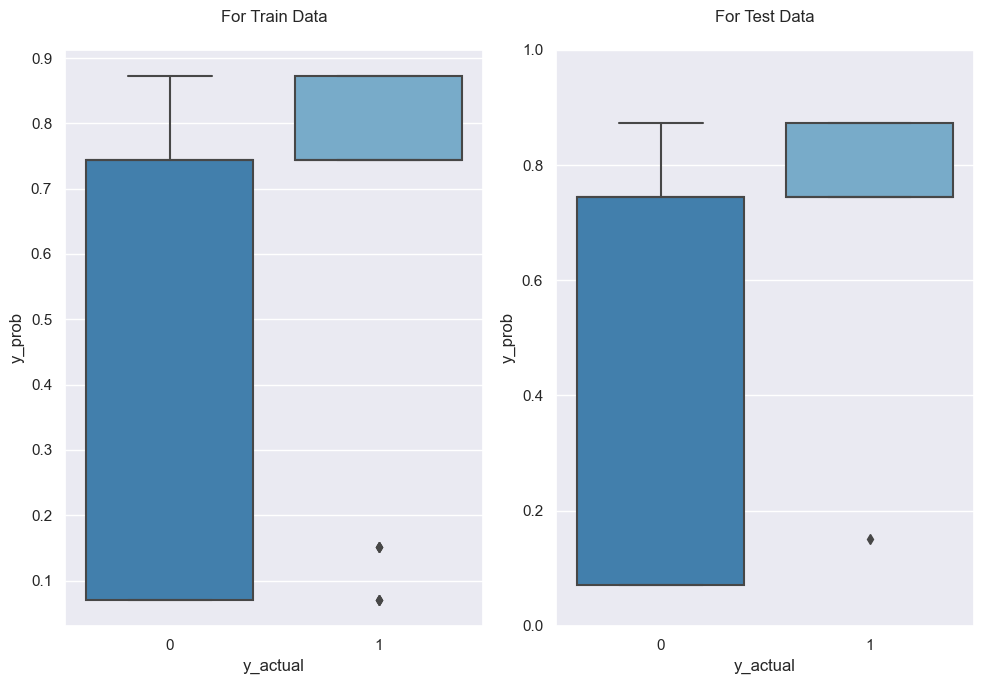

In [82]:
# Visualization

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,7))
sns.boxplot(x='y_actual', y='y_prob', data=train_pred, ax=ax[0])
ax[0].set_title('For Train Data', pad=20)


sns.boxplot(x='y_actual', y='y_prob', data=test_pred, ax=ax[1])
ax[1].set_title('For Test Data', pad=20)


plt.ylim(top=1, bottom=0)
plt.tight_layout()
plt.show()


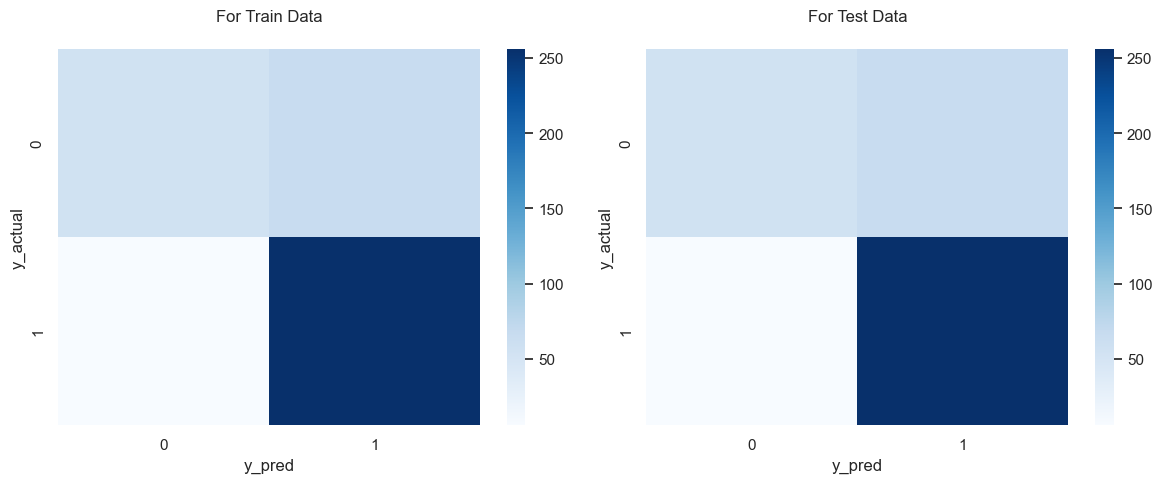

In [83]:
# Visualization

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

sns.heatmap(pd.crosstab(train_pred.y_actual, train_pred.y_pred), cmap='Blues', ax=ax[0])
ax[0].set_title('For Train Data', pad=20)
sns.heatmap(pd.crosstab(train_pred.y_actual, train_pred.y_pred), cmap='Blues', ax=ax[1])
ax[1].set_title('For Test Data', pad=20)


plt.tight_layout()
plt.show()

###### Scoring

In [84]:
# ROC_AUC_score

print('ROC_AUC_score for train data : ', roc_auc_score(train_pred.y_actual, train_pred.y_prob))
print('ROC_AUC_score for test data : ', roc_auc_score(test_pred.y_actual, test_pred.y_prob))


print('__________________________________________________________________________________')

print('This is good as difference is :', roc_auc_score(train_pred.y_actual, train_pred.y_prob) - 
      roc_auc_score(test_pred.y_actual, test_pred.y_prob))

ROC_AUC_score for train data :  0.7676645006624188
ROC_AUC_score for test data :  0.7549931600547195
__________________________________________________________________________________
This is good as difference is : 0.012671340607699255


In [85]:
# Classification report

print('For train data :')
print(classification_report(train_pred.y_actual, train_pred.y_pred))
print('_______________________________________________________________')
print('For test data :')
print(classification_report(test_pred.y_actual, test_pred.y_pred))

For train data :
              precision    recall  f1-score   support

           0       0.90      0.45      0.60       121
           1       0.80      0.98      0.88       262

    accuracy                           0.81       383
   macro avg       0.85      0.72      0.74       383
weighted avg       0.83      0.81      0.79       383

_______________________________________________________________
For test data :
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.77      0.99      0.87        85

    accuracy                           0.80       128
   macro avg       0.86      0.70      0.72       128
weighted avg       0.83      0.80      0.77       128



###### Decile Analysis

In [86]:
# For train train_pred


train_pred['deciles'] = pd.qcut(train_pred.y_prob, q=10, labels = False, duplicates='drop')


train_pred.head()

y_actual    y_prob  y_pred  deciles
507         1  0.744507       1        0
173         1  0.872608       1        1
80          1  0.872608       1        1
46          0  0.070530       0        0
246         1  0.872608       1        1

In [114]:
# For train test_pred

test_pred['deciles'] = pd.qcut(test_pred.y_prob, q=2, labels = False)


test_pred.head()

y_actual    y_prob  y_pred  deciles
47          1  0.872608       1        1
345         1  0.744507       1        0
284         0  0.744507       1        0
221         1  0.872608       1        1
502         0  0.744507       1        0

In [88]:
train_pred.groupby(by=['deciles'])[['y_prob','y_actual']].agg({'y_prob':['max', 'min'], 
                                                             'y_actual':['sum', 'count']}).sort_index(ascending=False)


y_prob           y_actual      
              max       min      sum count
deciles                                   
1        0.872608  0.872608      111   127
0        0.744507  0.070530      151   256

In [89]:
test_pred.groupby(by='deciles')[['y_prob','y_actual']].agg({'y_prob':['max', 'min'], 
                                                            'y_actual':['sum', 'count']}).sort_index(ascending=False)


y_prob           y_actual      
              max       min      sum count
deciles                                   
1        0.872608  0.872608       38    45
0        0.744507  0.070530       47    83

In [90]:
train_pred.y_prob.value_counts()

y_prob
0.744507    195
0.872608    127
0.070530     40
0.151371     21
Name: count, dtype: int64

###### Reason why decile analysis is not working here : 
* There are only 4 values for y_prob in both dataframes "test_pred" and "train_pred".
* This is why "q=10" is not working in pd.qcut() above.
* These is very less count for y_prob below 0.151371

In [91]:
# However, domething else can be worked here

In [92]:
train_pred.groupby('y_pred')[['y_actual', 'y_prob']].agg({'y_prob':['max', 'min'], 
                                                            'y_actual':['sum', 'count']}).sort_index(ascending=False)

y_prob           y_actual      
             max       min      sum count
y_pred                                   
1       0.872608  0.744507      256   322
0       0.151371  0.070530        6    61

In [93]:
test_pred.groupby('y_pred')[['y_actual', 'y_prob']].agg({'y_prob':['max', 'min'], 
                                                            'y_actual':['sum', 'count']}).sort_index(ascending=False)

y_prob           y_actual      
             max       min      sum count
y_pred                                   
1       0.872608  0.744507       84   109
0       0.151371  0.070530        1    19

# Machine Learining Model

In [94]:
# Significant variables with minimum multi-collinearity as per above vif, somard'D and SelectKBest

print("Variables list :", var_list)

Variables list : ['Credit_History_1', 'Education_Not_Graduate', 'Property_Area_Urban', 'Property_Area_Semiurban', 'Married_Yes']


###### Train test split

In [95]:
train_x, test_x, train_y, test_y = train_test_split(df, df.Application_Status, train_size=0.7, random_state=1)


print(train_x.head())
print('_____________________________________________________')
print(test_x.head())
print('_____________________________________________________')
print(train_y.head())
print('_____________________________________________________')
print(test_y.head())


     Application_Status  Credit_History_1  Dependents_1  Dependents_2  \
61                    0                 0             0             0   
422                   1                 1             0             0   
39                    1                 1             0             0   
436                   1                 1             0             1   
236                   1                 1             0             0   

     Dependents_3  Education_Not_Graduate  Gender_Male  Income_low  \
61              0                       0            0           0   
422             0                       0            1           1   
39              0                       0            1           0   
436             0                       0            1           0   
236             0                       0            1           1   

     Income_medium  Married_Yes  Property_Area_Semiurban  Property_Area_Urban  \
61               1            0                        1   

In [96]:
# Using Logistics Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [97]:
lr_grid = {'penalty':['l1', 'l2', 'elasticnet', None], 'C': [0.1, 0.25, 0.5, 0.75, 1]}

In [98]:
lr = GridSearchCV(LogisticRegression(random_state=1) ,lr_grid, verbose=True, cv=5)

lr

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             verbose=True)

In [99]:
lr.fit(train_x, train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             verbose=True)

In [100]:
lr.predict_proba(test_x)[:,1].shape

(154,)

In [101]:
lr.predict(test_x).shape

(154,)

In [102]:
# Scoring


# For train data

lr_train = pd.DataFrame({'y_actual':train_y, "y_pred":lr.predict(train_x), 'y_prob': lr.predict_proba(train_x)[:,1]})


# For test data

lr_test = pd.DataFrame({'y_actual':test_y, "y_pred":lr.predict(test_x), 'y_prob': lr.predict_proba(test_x)[:,1]})




print("lr_train :", lr_train)
print("__________________________________________________________________")
print("lr_test :", lr_test)

lr_train :      y_actual  y_pred    y_prob
61          0       0  0.175154
422         1       1  0.894821
39          1       1  0.883416
436         1       1  0.894838
236         1       1  0.891119
..        ...     ...       ...
255         0       0  0.317237
72          1       1  0.907638
396         1       1  0.892442
235         1       1  0.910136
37          1       1  0.864816

[357 rows x 3 columns]
__________________________________________________________________
lr_test :      y_actual  y_pred    y_prob
47          1       1  0.917454
345         1       1  0.884995
284         0       0  0.304833
221         1       1  0.899727
502         0       0  0.322246
..        ...     ...       ...
95          1       1  0.870353
122         1       1  0.899353
162         0       0  0.305657
23          0       0  0.296385
13          1       1  0.899814

[154 rows x 3 columns]


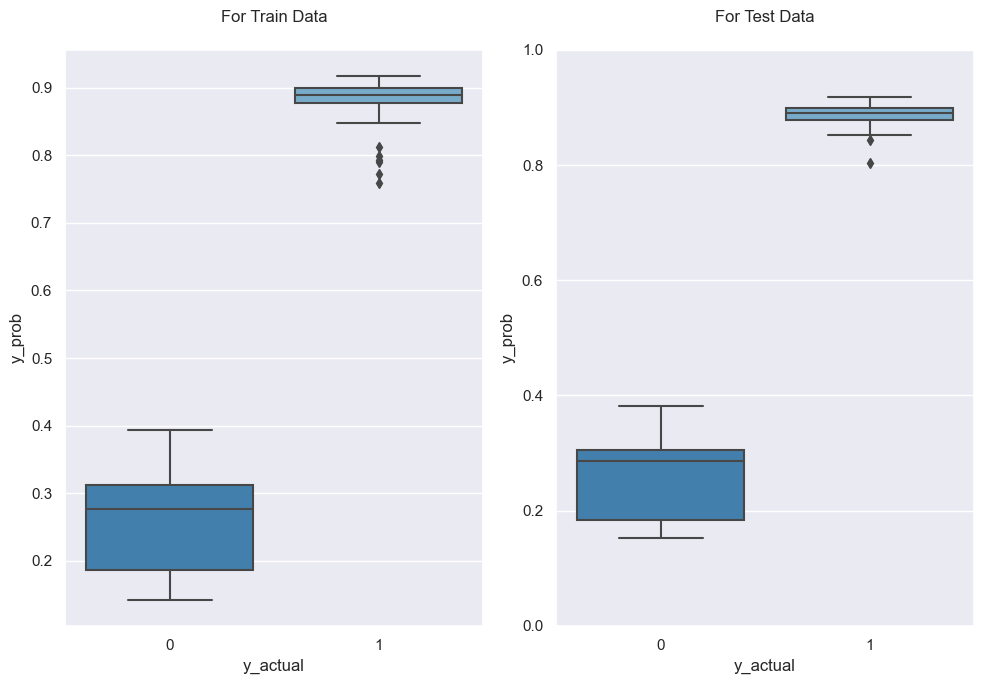

In [103]:
# Visualization

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,7))
sns.boxplot(x='y_actual', y='y_prob', data=lr_train, ax=ax[0])
ax[0].set_title('For Train Data', pad=20)


sns.boxplot(x='y_actual', y='y_prob', data=lr_test, ax=ax[1])
ax[1].set_title('For Test Data', pad=20)


plt.ylim(top=1, bottom=0)
plt.tight_layout()
plt.show()


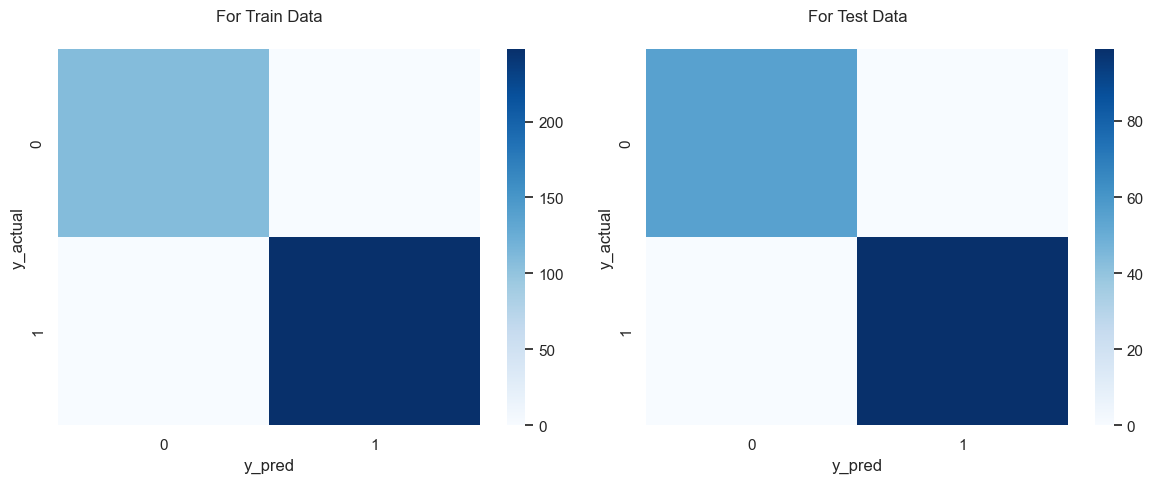

In [104]:
# Visualization

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

sns.heatmap(pd.crosstab(lr_train.y_actual, lr_train.y_pred), cmap='Blues', ax=ax[0])
ax[0].set_title('For Train Data', pad=20)
sns.heatmap(pd.crosstab(lr_test.y_actual, lr_test.y_pred), cmap='Blues', ax=ax[1])
ax[1].set_title('For Test Data', pad=20)


plt.tight_layout()
plt.show()

In [105]:
# ROC_AUC_Score


print("roc_auc_score for train data : ", roc_auc_score(lr_train.y_actual, lr_train.y_prob))
print("________________________________________________________________")
print("roc_auc_score for train data : ", roc_auc_score(lr_test.y_actual, lr_test.y_prob))
print("________________________________________________________________")
print('The difference between roc_auc_score of train and test data is :', abs(roc_auc_score(lr_train.y_actual, lr_train.y_prob)- roc_auc_score(lr_test.y_actual, lr_test.y_prob)))

roc_auc_score for train data :  1.0
________________________________________________________________
roc_auc_score for train data :  1.0
________________________________________________________________
The difference between roc_auc_score of train and test data is : 0.0


In [106]:
# Classification report

print("for train data :")
print(classification_report(lr_train.y_actual, lr_train.y_pred))
print('________________________________________________________________________')
print("for test data :")
print(classification_report(lr_test.y_actual, lr_test.y_pred))

for train data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       248

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

________________________________________________________________________
for test data :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        99

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



###### Decile analysis

In [107]:
# Creating variable deciles for both lr_test and lr_train

lr_train['decile'] = pd.qcut(lr_train.y_prob, 10, labels=False)
lr_test['decile'] = pd.qcut(lr_test.y_prob, 10, labels=False)

In [108]:
'For train data'

lr_train.groupby('decile')[['y_prob', 'y_actual']].agg({'y_prob':['max', 'min'], 
                                                        'y_actual':['sum', 'count']}).sort_index(ascending=False)

y_prob           y_actual      
             max       min      sum count
decile                                   
9       0.917454  0.907806       35    35
8       0.907638  0.899814       31    31
7       0.899727  0.892653       38    38
6       0.892560  0.886718       39    39
5       0.886605  0.878819       34    34
4       0.878800  0.871617       37    37
3       0.871064  0.374144       34    36
2       0.363190  0.306706        0    32
1       0.306041  0.199062        0    39
0       0.197766  0.142261        0    36

In [109]:
'For test data'

lr_test.groupby('decile')[['y_prob', 'y_actual']].agg({'y_prob':['max', 'min'], 
                                                        'y_actual':['sum', 'count']}).sort_index(ascending=False)

y_prob           y_actual      
             max       min      sum count
decile                                   
9       0.917454  0.906312       15    15
8       0.904339  0.899727       15    15
7       0.899353  0.892163       16    16
6       0.891119  0.883199       16    16
5       0.883015  0.877114       15    15
4       0.876533  0.863240       15    15
3       0.862966  0.330804        7    16
2       0.328865  0.293842        0    15
1       0.293115  0.184956        0    15
0       0.184657  0.152721        0    16

### Analysis:

1. Model is having an accuracy of 1, which is very good.
2. For this model all the variables is used.
3. Recall, precision and f1_score are also 1.
4. As per the test data we cannot say that model is overfitted.
5. Although accuracy is high, but data sample for both train and test is very small.
6. As per Decile analysis also, this is good model.

In [110]:
# Saving model as pickle

import pickle

In [111]:
pickle.dump(lr, open('C:/Users/navee/OneDrive/Desktop/Casestudy/Case_study_1/Classification_model_loan_data.pkl', 'wb'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/navee/OneDrive/Desktop/Casestudy/Case_study_1/Classification_model_loan_data.pkl'

# End